# Parte 4

#### Observar como cambia la función de correlación con el número de puntos aleatorios. a) Usando 1 archivo con 1, 5, 10 y 50 veces el número de puntos que los datos, y promedia los histogramas b) Usando 1 archivo con 1, 5, 10 y 50 veces el número de puntos que los datos, y promedia las funciones de correlación c) Usando 1, 5, 10 y 50 archivos de muestras aleatorias con el mismo número de puntos que los datos

In [1]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib. pyplot as plt
import numpy as np
import random
import math
import scipy.spatial.distance as dist
%matplotlib inline

In [2]:
def dis_NN(m): 
    a = []
    b = []
    dis = []
    for i in range(len(m)):
        a.append(m[:,0]-m[:,0][i]) #guardamos las difrerencias en x
        b.append(m[:,1]-m[:,1][i]) #guardamos las difrerencias en y
    dis = np.sqrt(np.power(a,2)+np.power(b,2)) #sacamos la distancias con pitagoras
    return dis.reshape(-1) #regresa un arreglo unidimencional.

In [3]:
def dis_MN(m,n):
    a = []
    b = []
    dis = []
    for i in range(len(m)):
        a.append(n[:,0]-m[:,0][i]) #guardamos las difrerencias en x
        b.append(n[:,1]-m[:,1][i]) #guardamos las difrerencias en y
    dis = np.sqrt(np.power(a,2)+np.power(b,2)) #sacamos la distancias con pitagoras
    return dis.reshape(-1) #regresa un arreglo unidimencional.

In [70]:
def Histo_dist (Dist,bins_0):

    frec, b = np.histogram(Dist, bins = bins_0)

    histo_2d = np.array(Dist) 
    plt.figure()
    plt.hist(histo_2d, bins=bins_0)
    plt.title("Histograma de distancias",fontsize=18)
    plt.ylabel("Frecuencia",fontsize=18) 
    plt.xlabel("Distancia",fontsize=18)
    plt.show()
    return frec, b

In [122]:
def Histo_dist_com_2 (NN_1,NN_2,NN_3,NN_4,bins_0):
    frec_1, b_1 = np.histogram(NN_1, bins = bins_0)
    frec_2, b_2 = np.histogram(NN_2, bins = bins_0)
    frec_3, b_3 = np.histogram(NN_3, bins = bins_0)
    frec_4, b_4 = np.histogram(NN_4, bins = bins_0)
    
    histo_1 = np.array(NN_1)
    histo_2 = np.array(NN_2) 
    histo_3 = np.array(NN_3) 
    histo_4 = np.array(NN_4) 
 
    plt.figure()
    plt.hist(histo_1, bins=bins_0,color = 'r' , alpha =0.2)
    plt.hist(histo_2, bins=bins_0,color = 'b' , alpha =0.4)
    plt.hist(histo_3, bins=bins_0,color = 'y' , alpha =0.6)
    plt.hist(histo_4, bins=bins_0,color = 'y' , alpha =0.8)
    plt.title("Histograma de distancias",fontsize=18)
    plt.ylabel("Frecuencia",fontsize=18) 
    plt.xlabel("Distancia",fontsize=18)
    plt.show()
    
    return (np.array(frec_1)+np.array(frec_2)+np.array(frec_3)+np.array(frec_4))/4 , (np.array(b_1)+np.array(b_2)+np.array(b_3)+np.array(b_4))/4

In [5]:
def Pee_Hau(DD,RR,Nd,Nr):
    n = pow((Nr*(Nr-1))/(Nd*(Nd-1)),0.5)
    return ((np.divide(DD,RR))/pow(n,2)) -1

In [6]:
def Dav_Pee(DD,DR,Nd,Nr):
    n = pow((Nr*(Nr-1))/(Nd*(Nd-1)),0.5)
    return ((np.divide(DD,DR))/(n)) -1

In [98]:
def Hamilton(DD,RR,DR):
    return np.divide(DD*RR,np.power(DR,2))-1

In [8]:
def Lan_Sza(DD,RR,DR,Nd,Nr):
    n = pow((Nr*(Nr-1))/(Nd*(Nd-1)),0.5)
    return 1 + ((np.divide(DD,RR))/pow(n,2)) - 2*((np.divide(DR,RR))/n)

In [9]:
def malla_cuad (tamaño,ret): # Depende del tamaño de la caja y de la distancia entre los puntos. 
    
    DD = [] 
    DD = open('Tabla_Datos_malla.dat',"w")  #abrimos un scrip para manejar los datos.
    c, d = 0, 0
    
    for i in range(int(tamaño/ret)): 
        for j in range(int(tamaño/ret)):
            c, d  = i*ret, j*ret 
            DD.write("%f  \t%f \n" % (c,d))
    DD.close()
    
    return np.loadtxt('Tabla_Datos_malla.dat') 

In [10]:
def disco_random (rad,puntos): #Depende del radio y la cantidad de puntos dentro de él.
    
    D = []
    D = open('Tabla_Datos_disco.dat',"w")  #abrimos un scrip para manejar los datos.
    
    for i in range(puntos):
        r = pow(random.randrange(0,rad**2,1),0.5) #Radio aleatorio tomando en cuenta el jacobiano.
        th = random.random()*2*math.pi #valor de theta aleatorio, 
        x = r*math.cos(th) # usando la ecuación parametrica del círculo 
        y = r*math.sin(th)
        D.write("%f  \t%f \n" % (x,y)) 
    D.close()
    
    return np.loadtxt('Tabla_Datos_disco.dat')

In [11]:
def anillo_random(rad_ex,rad_in,puntos):  #Depende del radio esterior y interior, ademas de la cantidad de puntos dentro de él.
    D = []
    D = open('Tabla_Datos_Aro.dat',"w")  #abrimos un scrip para manejar los datos.
    
    for i in range(puntos):
        r = pow(random.randrange(rad_in**2,rad_ex**2,1),0.5) #puntos aleatorios en un radio interior y uno exterior
        th = random.random()*2*math.pi
        x = r*math.cos(th) 
        y = r*math.sin(th)
        D.write("%f  \t%f \n" % (x,y))
    D.close()
    
    return np.loadtxt('Tabla_Datos_Aro.dat') # u = RR_1[:,0] y v = RR_1[:,1]

In [14]:
# d) 50 anillos con 100 puntos aleatorios cada uno cuyos centros están distribuidos aleatoriamente sobre la caja
def anillos_randoms_2(num_anillos, puntos, tam_caja):
     
    D_5 = []
    D_5 = open('Tabla_Datos_anillos_aleatorios2.dat',"w")  #abrimos un scrip para manejar los datos.
    
    for i in range(num_anillos):
        rad_in = random.randrange(0,tam_caja,1)
        rad_ext = 10 + rad_in
        r_x0 = random.randrange(0,tam_caja,1) # coordenada x donde se ubicará el anillo
        r_y0 = random.randrange(0,tam_caja,1) # coordenada y donde se ubicará el anillo
        
        for j in range(puntos):
            r = pow(random.randrange(rad_in**2,rad_ext**2,1),0.5)
            th = random.random()*2*math.pi
            x = r*math.cos(th) + r_x0
            y = r*math.sin(th) + r_y0
            if 0<x<tam_caja and 0<y<tam_caja:
                D_5.write("%f  \t%f \n" % (x,y))
    D_5.close()
    
    return np.loadtxt('Tabla_Datos_anillos_aleatorios2.dat')

#### Creamos los datos

In [23]:
malla = malla_cuad(300,30) #hacemos una malla de tamaño 1000x1000 (10x10 cada reticula)
disco = disco_random(100,100) #Hacemos un disco de radio 100 con 1000 puntos
anillo = anillo_random(300,290,100) # Anillo de radio interno 290 y radio externo 300 con 1000 puntos
anillos_r = anillos_randoms_2(10,20,100)

In [16]:
dis_malla = dis_NN(malla)
dis_disco = dis_NN(disco)
dis_anillo = dis_NN(anillo)
dis_anillos_r = dis_NN(anillos_r)

#### Creamos los Datos aleatorios R

In [17]:
def caja_Rand(dim,puntos): 
    R = open('Tabla_Aleatorios.dat',"w") #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        a, b = 0, 0 #iniciamos las variables
        a = random.random()*dim #random.random sólo da valores entre 0 y 1 por lo que lo multiplico por la dimención de la caja
        b = random.random()*dim
        R.write("%f  \t%f \n" % (a,b)) #escribimos los valores en el scip.
    R.close()
    return np.loadtxt('Tabla_Aleatorios.dat') # x = RR[:,0] | y = RR[:,1]

In [24]:
dimencion = 300
puntos = len(malla)
R_malla_1 = caja_Rand(dimencion,puntos) #hacemos la caja
dimencion = 300
puntos = len(malla)*5
R_malla_5 = caja_Rand(dimencion,puntos) #hacemos la caja
dimencion = 300
puntos = len(malla)*10
R_malla_10 = caja_Rand(dimencion,puntos) #hacemos la caja
dimencion = 300
puntos = len(malla)*50
R_malla_50 = caja_Rand(dimencion,puntos) #hacemos la caja

In [25]:
dimencion = 100
puntos = len(disco)
R_disco_1 = caja_Rand(dimencion,puntos) #hacemos la caja
dimencion = 100
puntos = len(disco)*5
R_disco_5 = caja_Rand(dimencion,puntos) #hacemos la caja
dimencion = 100
puntos = len(disco)*10
R_disco_10 = caja_Rand(dimencion,puntos) #hacemos la caja
dimencion = 100
puntos = len(disco)*50
R_disco_50 = caja_Rand(dimencion,puntos) #hacemos la caja

In [26]:
dimencion = 300
puntos = len(anillo)
R_anillo_1 = caja_Rand(dimencion,puntos) #hacemos la caja
dimencion = 300
puntos = len(anillo)*5
R_anillo_5 = caja_Rand(dimencion,puntos) #hacemos la caja
dimencion = 300
puntos = len(anillo)*10
R_anillo_10 = caja_Rand(dimencion,puntos) #hacemos la caja
dimencion = 300
puntos = len(anillo)*50
R_anillo_50 = caja_Rand(dimencion,puntos) #hacemos la caja

In [32]:
dimencion = 100
puntos = len(anillos_r)
R_anillos_r_1 = caja_Rand(dimencion,puntos) #hacemos la caja
dimencion = 100
puntos = len(anillos_r)*5
R_anillos_r_5 = caja_Rand(dimencion,puntos) #hacemos la caja
dimencion = 100
puntos = len(anillos_r)*10
R_anillos_r_10 = caja_Rand(dimencion,puntos) #hacemos la caja
dimencion = 100
puntos = len(anillos_r)*50
R_anillos_r_50 = caja_Rand(dimencion,puntos) #hacemos la caja

#### Obtenemos las distancias entre los datos aleatorios:

Malla:

In [28]:
dis_R_malla_1 = dis_NN(R_malla_1) #arreglo de distancias
dis_R_malla_5 = dis_NN(R_malla_5)
dis_R_malla_10 = dis_NN(R_malla_10)
dis_R_malla_50 = dis_NN(R_malla_50)

Disco:

In [29]:
dis_R_disco_1 = dis_NN(R_disco_1) 
dis_R_disco_5 = dis_NN(R_disco_5) 
dis_R_disco_10 = dis_NN(R_disco_10) 
dis_R_disco_50 = dis_NN(R_disco_50) 

Anillo:

In [30]:
dis_R_anillo_1 = dis_NN(R_anillo_1)
dis_R_anillo_5 = dis_NN(R_anillo_5)
dis_R_anillo_10 = dis_NN(R_anillo_10)
dis_R_anillo_50 = dis_NN(R_anillo_50)

Anillos randoom:

In [33]:
dis_R_anillos_r_1 = dis_NN(R_anillos_r_1)
dis_R_anillos_r_5 = dis_NN(R_anillos_r_5)
dis_R_anillos_r_10 = dis_NN(R_anillos_r_10)
dis_R_anillos_r_50 = dis_NN(R_anillos_r_50)

#### Distancias DR:

In [36]:
dis_DR_malla_1 = dis_MN(malla,R_malla_1)
dis_DR_malla_5 = dis_MN(malla,R_malla_5)
dis_DR_malla_10 = dis_MN(malla,R_malla_10)
dis_DR_malla_50 = dis_MN(malla,R_malla_50)

In [37]:
dis_DR_disco_1 = dis_MN(disco,R_disco_1)
dis_DR_disco_5 = dis_MN(disco,R_disco_5)
dis_DR_disco_10 = dis_MN(disco,R_disco_10)
dis_DR_disco_50 = dis_MN(disco,R_disco_50)

In [38]:
dis_DR_anillo_1 = dis_MN(anillo,R_anillo_1)
dis_DR_anillo_5 = dis_MN(anillo,R_anillo_5)
dis_DR_anillo_10 = dis_MN(anillo,R_anillo_10)
dis_DR_anillo_50 = dis_MN(anillo,R_anillo_50)

In [39]:
dis_DR_anillos_r_1 = dis_MN(anillos_r,R_anillos_r_1)
dis_DR_anillos_r_5 = dis_MN(anillos_r,R_anillos_r_5)
dis_DR_anillos_r_10 = dis_MN(anillos_r,R_anillos_r_10)
dis_DR_anillos_r_50 = dis_MN(anillos_r,R_anillos_r_50)

# a) Usando 1 archivo con 1, 5, 10 y 50 veces el número de puntos que los datos, y promedia los histogramas

## MALLA

<Figure size 432x288 with 0 Axes>

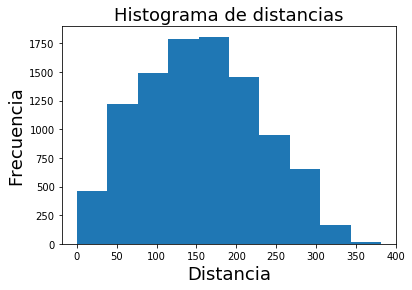

In [123]:
binn = 10
DD_malla, bins_D_malla = Histo_dist(dis_malla,binn)

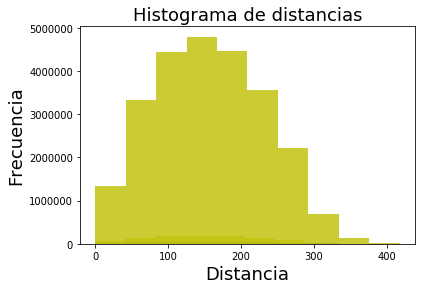

In [124]:
RR_malla, bins_R_malla  = Histo_dist_com_2(dis_R_malla_1, dis_R_malla_5, dis_R_malla_10, dis_R_malla_50, binn)

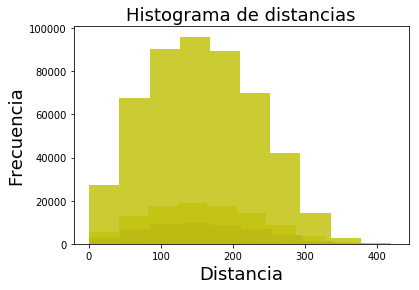

In [125]:
DR_malla, bins_DR_malla  = Histo_dist_com_2(dis_DR_malla_1, dis_DR_malla_5, dis_DR_malla_10, dis_DR_malla_50, binn)

In [126]:
PH_malla = Pee_Hau(DD_malla,RR_malla,len(malla),len(R_malla_1))
DP_malla = Dav_Pee(DD_malla,DR_malla,len(malla),len(R_malla_1))
HM_malla = Hamilton(DD_malla,RR_malla,DR_malla)
LS_malla = Lan_Sza(DD_malla,RR_malla,DR_malla,len(malla),len(R_malla_1))

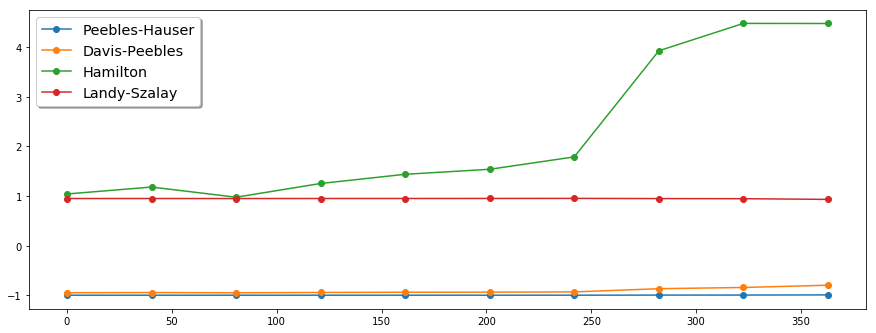

In [127]:
plt.figure(figsize=(15,5.5))
plt.plot(bins_R_malla[:-1],PH_malla,'o-',label='Peebles-Hauser')
plt.plot(bins_R_malla[:-1],DP_malla,'o-',label='Davis-Peebles')
plt.plot(bins_R_malla[:-1],HM_malla,'o-',label='Hamilton')
plt.plot(bins_R_malla[:-1],LS_malla,'o-',label='Landy-Szalay')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')

## DISCO

<Figure size 432x288 with 0 Axes>

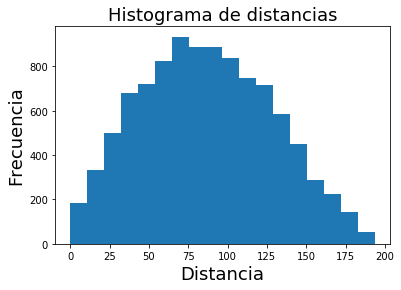

In [128]:
binn = 18
DD_disco, bins_D_disco = Histo_dist(dis_disco,binn)

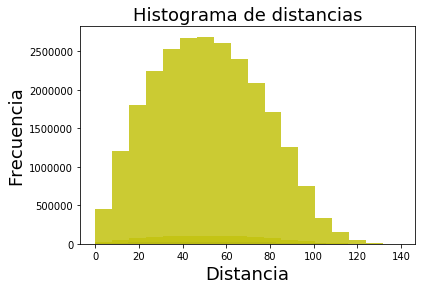

In [129]:
RR_disco, bins_R_disco  = Histo_dist_com_2(dis_R_disco_1, dis_R_disco_5, dis_R_disco_10, dis_R_disco_50, binn)

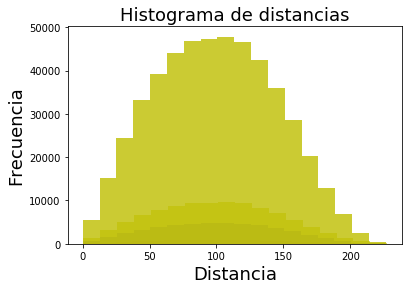

In [131]:
DR_disco, bins_DR_disco  = Histo_dist_com_2(dis_DR_disco_1, dis_DR_disco_5, dis_DR_disco_10, dis_DR_disco_50, binn)

In [132]:
PH_disco = Pee_Hau(DD_disco,RR_disco,len(disco),len(R_disco_1))
DP_disco = Dav_Pee(DD_disco,DR_disco,len(disco),len(R_disco_1))
HM_disco = Hamilton(DD_disco,RR_disco,DR_disco)
LS_disco = Lan_Sza(DD_disco,RR_disco,DR_disco,len(disco),len(R_disco_1))

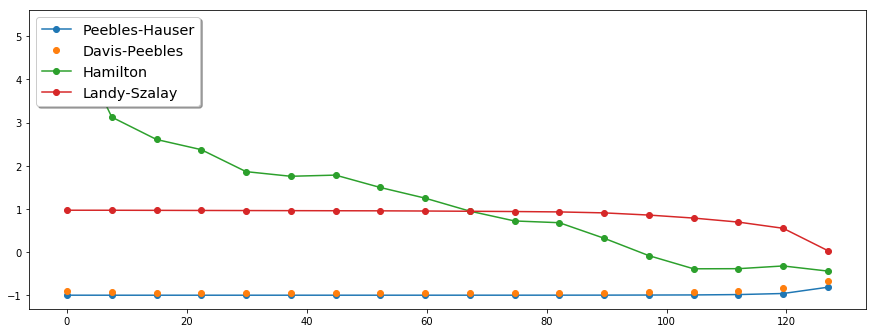

In [134]:
plt.figure(figsize=(15,5.5))
plt.plot(bins_R_disco[:-1],PH_disco,'o-',label='Peebles-Hauser')
plt.plot(bins_R_disco[:-1],DP_disco,'o',label='Davis-Peebles')
plt.plot(bins_R_disco[:-1],HM_disco,'o-',label='Hamilton')
plt.plot(bins_R_disco[:-1],LS_disco,'o-',label='Landy-Szalay')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')

## ANILLO

<Figure size 432x288 with 0 Axes>

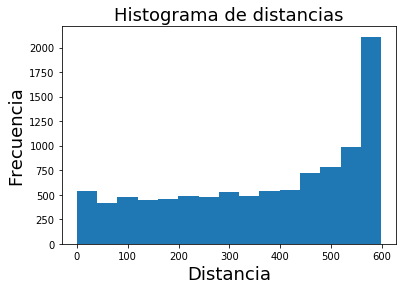

In [139]:
binn =15
DD_anillo, bins_D_anillo = Histo_dist(dis_anillo,binn)

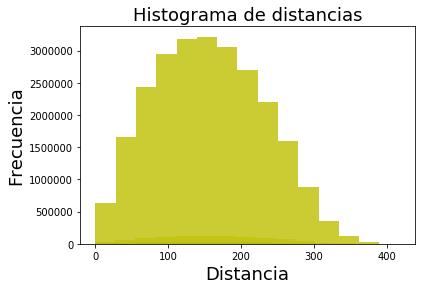

In [140]:
RR_anillo, bins_R_anillo  = Histo_dist_com_2(dis_R_anillo_1, dis_R_anillo_5, dis_R_anillo_10, dis_R_anillo_50, binn)

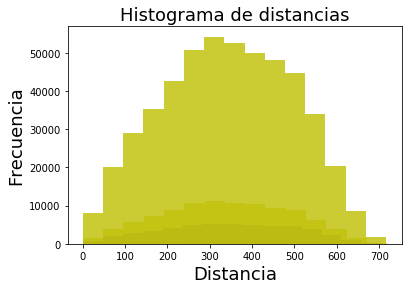

In [141]:
DR_anillo, bins_DR_anillo  = Histo_dist_com_2(dis_DR_anillo_1, dis_DR_anillo_5, dis_DR_anillo_10, dis_DR_anillo_50, binn)

In [142]:
PH_anillo = Pee_Hau(DD_anillo,RR_anillo,len(anillo),len(R_anillo))
DP_anillo = Dav_Pee(DD_anillo,DR_anillo,len(anillo),len(R_anillo))
HM_anillo = Hamilton(DD_anillo,RR_anillo,DR_anillo)
LS_anillo = Lan_Sza(DD_anillo,RR_anillo,DR_anillo,len(anillo),len(R_anillo))

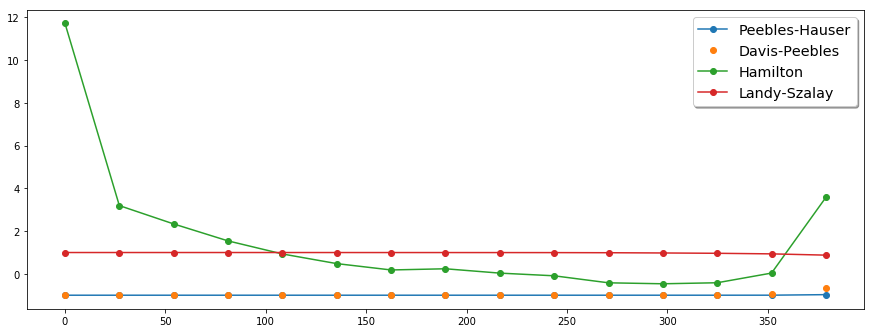

In [144]:
plt.figure(figsize=(15,5.5))
plt.plot(bins_R_anillo[:-1],PH_anillo,'o-',label='Peebles-Hauser')
plt.plot(bins_R_anillo[:-1],DP_anillo,'o',label='Davis-Peebles')
plt.plot(bins_R_anillo[:-1],HM_anillo,'o-',label='Hamilton')
plt.plot(bins_R_anillo[:-1],LS_anillo,'o-',label='Landy-Szalay')
plt.legend( shadow=True, fontsize='x-large')

## ANILLOS RANDOOM

<Figure size 432x288 with 0 Axes>

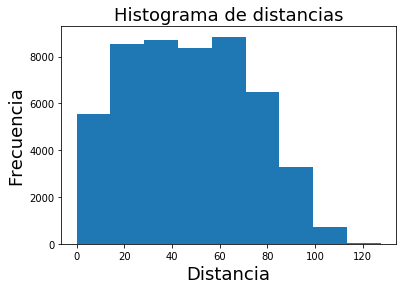

In [157]:
binn = 9
DD_anillos_r, bins_D_anillos_r = Histo_dist(dis_anillos_r,binn)

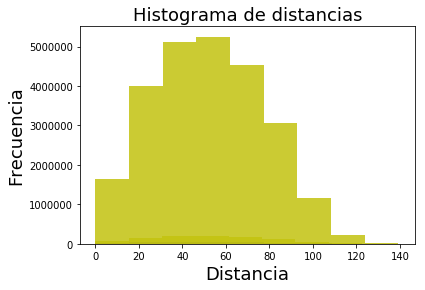

In [158]:
RR_anillos_r, bins_R_anillos_r  = Histo_dist_com_2(dis_R_anillos_r_1, dis_R_anillos_r_5, dis_R_anillos_r_10, dis_R_anillos_r_50, binn)

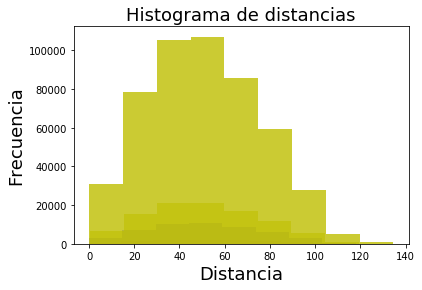

In [159]:
DR_anillos_r, bins_DR_anillos_r  = Histo_dist_com_2(dis_DR_anillos_r_1, dis_DR_anillos_r_5, dis_DR_anillos_r_10, dis_DR_anillos_r_50, binn)

In [160]:
PH_anillos_r = Pee_Hau(DD_anillos_r,RR_anillos_r,len(anillos_r),len(R_anillos_r))
DP_anillos_r = Dav_Pee(DD_anillos_r,DR_anillos_r,len(anillos_r),len(R_anillos_r))
HM_anillos_r = Hamilton(DD_anillos_r,RR_anillos_r,DR_anillos_r)
LS_anillos_r = Lan_Sza(DD_anillos_r,RR_anillos_r,DR_anillos_r,len(anillos_r),len(R_anillos_r))

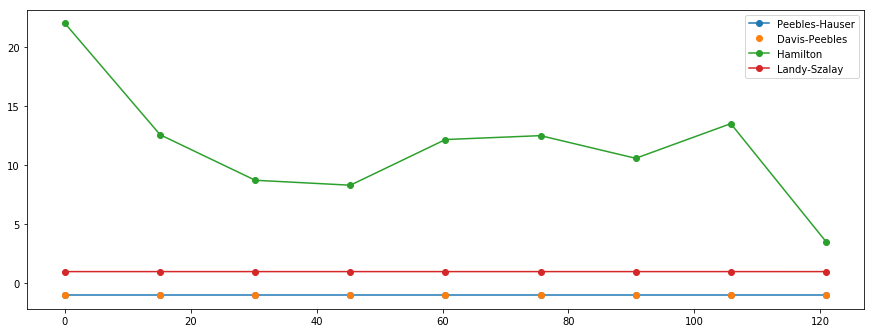

In [161]:
plt.figure(figsize=(15,5.5))
plt.plot(bins_R_anillos_r[:-1],PH_anillos_r,'o-',label='Peebles-Hauser')
plt.plot(bins_R_anillos_r[:-1],DP_anillos_r,'o',label='Davis-Peebles')
plt.plot(bins_R_anillos_r[:-1],HM_anillos_r,'o-',label='Hamilton')
plt.plot(bins_R_anillos_r[:-1],LS_anillos_r,'o-',label='Landy-Szalay')
plt.legend()